In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [3]:
def preprocess_image(image):
    image = tf.image.rgb_to_grayscale(image)
    return image


Loading Images

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            "train",
            shuffle=True,
            image_size=(256,256),
            batch_size=32
        )

Found 7771 files belonging to 4 classes.


Discover batches which loaded in

In [5]:
for image_per_batch, label_per_batch in dataset.take(1):
    print(image_per_batch.shape)
    print(label_per_batch.numpy())

(32, 256, 256, 3)
[0 3 2 3 1 2 0 1 3 0 3 0 1 3 3 0 3 1 2 0 0 1 0 0 3 3 0 3 0 3 0 2]


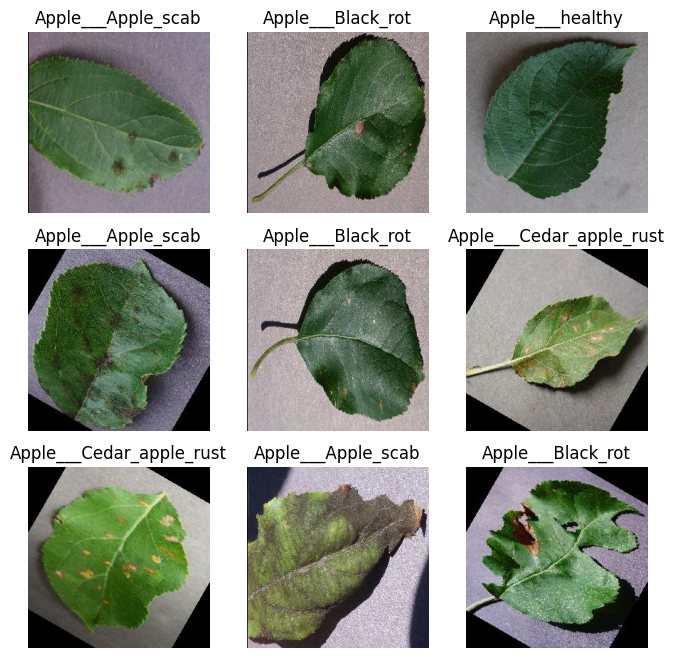

In [6]:
plt.figure(figsize=(8,8))
for image_per_batch, label_per_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_per_batch[i].numpy().astype(int))
        plt.title(dataset.class_names[label_per_batch[i]])
        plt.axis("off")

In [7]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VALID_RATIO = 0.1

In [8]:
len(dataset)*TRAIN_RATIO

194.4

In [9]:
train = dataset.take(194)
test = dataset.skip(194)

In [10]:
len(dataset) * TEST_RATIO

24.3

In [11]:
valid = test.skip(24)

In [12]:
test = test.take(24)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [14]:
model= Sequential()

model.add(tf.keras.layers.Resizing(128,128))
model.add(tf.keras.layers.Rescaling(1./255.))


model.add(Conv2D(32,(3,3), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(6,activation=tf.nn.softmax))

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
modelhistory = model.fit(train, batch_size = 32, verbose =1, epochs=10, validation_data = valid)

Epoch 1/10


194/194 [==============================] - 78s 394ms/step - loss: 0.6393 - accuracy: 0.7437 - val_loss: 0.5901 - val_accuracy: 0.7975
Epoch 2/10
194/194 [==============================] - 58s 299ms/step - loss: 0.2802 - accuracy: 0.8969 - val_loss: 0.3181 - val_accuracy: 0.8755
Epoch 3/10
194/194 [==============================] - 107s 552ms/step - loss: 0.2264 - accuracy: 0.9162 - val_loss: 0.2354 - val_accuracy: 0.9119
Epoch 4/10
194/194 [==============================] - 72s 370ms/step - loss: 0.1693 - accuracy: 0.9364 - val_loss: 0.1834 - val_accuracy: 0.9396
Epoch 5/10
194/194 [==============================] - 91s 467ms/step - loss: 0.0933 - accuracy: 0.9683 - val_loss: 0.1674 - val_accuracy: 0.9346
Epoch 6/10
194/194 [==============================] - 59s 302ms/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.1170 - val_accuracy: 0.9635
Epoch 7/10
194/194 [==============================] - 71s 367ms/step - loss: 0.0814 - accuracy: 0.9708 - val_loss: 0.1609 - val_accuracy: 0.

In [17]:
modelmetrics = model.evaluate(test)

24/24 [==============================] - 7s 121ms/step - loss: 0.0850 - accuracy: 0.9727


In [18]:
train_loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']
train_accuracy = modelhistory.history['accuracy']
val_accuracy = modelhistory.history['val_accuracy']

In [35]:
y_pred = model.predict(valid.take(1)).argmax(axis=-1)

1/1 [==============================] - 5s 5s/step


In [36]:
y_pred

array([1, 1, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3, 0, 1, 3, 3, 3, 3, 2, 2, 0, 3,
       2, 1, 1, 0, 3, 3, 3, 3, 3, 2], dtype=int64)

In [37]:
for images, labels in valid.take(1):  # only take first element of dataset
    numpy_labels = labels.numpy()


KeyboardInterrupt



In [31]:
numpy_labels

array([2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 2, 0])

In [ ]:
y_pred

array([[3.1481261e-04, 9.9968517e-01, 6.7813133e-08, 1.0070879e-11,
        8.2222890e-13, 1.9564516e-16],
       [1.4428381e-05, 3.3164192e-03, 4.2160700e-05, 9.9662709e-01,
        4.4375117e-09, 3.1295484e-09],
       [9.9996626e-01, 5.1237532e-07, 1.3509226e-07, 3.3104920e-05,
        1.3504158e-10, 2.9286604e-12],
       ...,
       [2.8173727e-07, 9.9999976e-01, 4.8232187e-09, 5.9516753e-10,
        5.0911640e-14, 2.1443064e-17],
       [2.3123862e-03, 3.6978125e-04, 2.0665192e-04, 9.9710637e-01,
        8.0024967e-07, 3.9882389e-06],
       [8.5467354e-07, 9.9999750e-01, 1.5845050e-06, 8.5339934e-08,
        3.3649489e-11, 2.7088837e-13]], dtype=float32)

In [ ]:
y_pred.shape

(795, 6)

In [ ]:
modelCSV = pd.DataFrame(modelhistory.history)
modelCSV.to_csv('Resize128&Normalization.csv')

In [ ]:
confMatrix = confusion_matrix(valid,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [25, 795]

In [ ]:
metricsCSV = pd.Dataframe(columns=['name','accuracy','f1score','recall','precision','tpr','tnr'])

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix



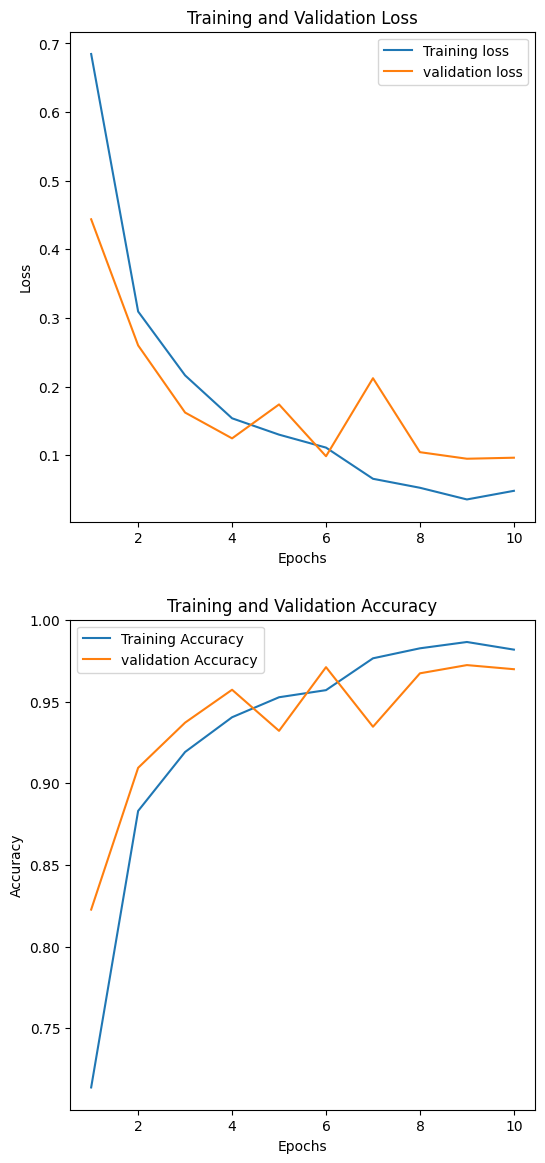

In [ ]:
epochs = range(1,11)
plt.figure(figsize=(6,14))

plt.subplot(2,1,1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2,1,2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()